### SVM Voice Classification
1) Read the dataset<br>
2) Remove/handle null values (if any)<br>
3) Depict percentage distribution of label on a pie chart<br>
4) Considering all the features as independent feature and 'label' as dependent feature, split the dataset into training and testing data with test size=20%<br>
5) Apply Support Vector Classifier on train data with different kernels and generate predictions on test data<br>
6) Also generate confusion_matrix and classification report for each of them<br>
7) Using Cross validation with 10 folds apply Support Vector Classifier and generate model accuracy and also compute mean accuracy
for linear, rbf and poly kernels separately<br>
8) Using C values in the range of 1-12 apply Cross validation for 4 folds for linear kernel and generate mean accuracy score. Plot C vs mean accuracy score on a line chart<br>
9) Using C values in the range of 1-12 apply Cross validation for 4 folds for rbf kernel and generate mean accuracy score. Plot C vs mean accuracy score on a line chart<br>
10) Using gamma values in the range given below apply Cross validation for 4 folds for rbf kernel and generate mean accuracy score. Plot gamma vs mean accuracy score on a line chart<br>
a) gamma_range = [0.0001,0.001,0.01,0.1,1,10,100]<br>
b) gamma_range = [0.01,0.02,0.03,0.04,0.05]<br>
11) Using degree values in the range of 1-6 apply Cross validation for 4 folds for poly kernel and generate mean accuracy score. Plot degree vs mean accuracy score on a line chart<br>

In [1]:
# Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

In [2]:
# 1. Read the dataset
df = pd.read_csv('voice.csv')
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [3]:
# 2. Remove/handle null values (if any)
df.isna().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

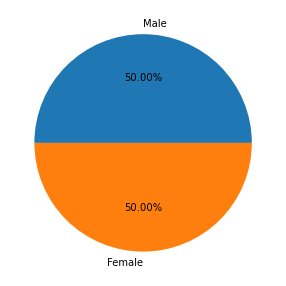

In [4]:
# 3. Depict percentage distribution of label on a pie chart
plt.figure(figsize=(7,5))
plt.pie(x=df.label.value_counts(),labels=['Male','Female'],autopct='%.2f%%');

In [5]:
# 4. Considering all the features as independent feature and 'label' as dependent feature, split the dataset into training and testing data with test size=20%
from sklearn.model_selection import train_test_split
X = df.drop(['label'],axis=1)
y = df.label
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((2534, 20), (2534,), (634, 20), (634,))

In [6]:
# 5. Apply Support Vector Classifier on train data with different kernels and generate predictions on test data
from sklearn.svm import SVC
mod = {} # stores the model
preds = {} # stores the predictions made by model
models= {'Linear_SVC':SVC(kernel='linear'),
         'Polynomial_SVC':SVC(kernel='poly'),
         'RBF_SVC':SVC(kernel='rbf')}
for key,model in models.items():
    mod[key] = model.fit(X_train,y_train)
    model_preds = model.predict(X_test)
    preds[key] = model_preds

In [7]:
mod

{'Linear_SVC': SVC(kernel='linear'),
 'Polynomial_SVC': SVC(kernel='poly'),
 'RBF_SVC': SVC()}

In [8]:
preds_df = pd.DataFrame(preds.values(),index=['Linear_Model','Polynomial_Model','RBF_Model'])
preds_df.T.head(10)

,Linear_Model,Polynomial_Model,RBF_Model
0,male,male,male
1,female,female,female
2,male,female,female
3,male,female,female
4,female,female,male
5,male,female,male
6,female,female,female
7,female,female,male
8,female,female,female
9,male,female,male


In [10]:
# 6. Also generate confusion_matrix and classification report for each of them
from sklearn.metrics import confusion_matrix, classification_report
print("For Linear Model:\n")
conf_mat_linear = confusion_matrix(y_test,preds['Linear_SVC'])
print(conf_mat_linear)
print(classification_report(y_test,preds['Linear_SVC']))
print()
print("For Polynomial Model:\n")
conf_mat_poly = confusion_matrix(y_test,preds['Polynomial_SVC'])
print(conf_mat_poly)
print(classification_report(y_test,preds['Polynomial_SVC']))
print()
print("For RBF Model:\n")
conf_mat_rbf = confusion_matrix(y_test,preds['RBF_SVC'])
print(conf_mat_rbf)
print(classification_report(y_test,preds['RBF_SVC']))

For Linear Model:

[[279  45]
 [  3 307]]
              precision    recall  f1-score   support

      female       0.99      0.86      0.92       324
        male       0.87      0.99      0.93       310

    accuracy                           0.92       634
   macro avg       0.93      0.93      0.92       634
weighted avg       0.93      0.92      0.92       634


For Polynomial Model:

[[317   7]
 [299  11]]
              precision    recall  f1-score   support

      female       0.51      0.98      0.67       324
        male       0.61      0.04      0.07       310

    accuracy                           0.52       634
   macro avg       0.56      0.51      0.37       634
weighted avg       0.56      0.52      0.38       634


For RBF Model:

[[172 152]
 [ 56 254]]
              precision    recall  f1-score   support

      female       0.75      0.53      0.62       324
        male       0.63      0.82      0.71       310

    accuracy                           0.67       634

In [16]:
mod

{'Linear_SVC': SVC(kernel='linear'),
 'Polynomial_SVC': SVC(kernel='poly'),
 'RBF_SVC': SVC()}

In [20]:
# 7. Using Cross validation with 10 folds apply Support Vector Classifier and generate model accuracy and also compute mean accuracy for linear, rbf and poly kernels separately
from sklearn.model_selection import cross_val_score
linear_cv = np.mean(cross_val_score(estimator = mod['Linear_SVC'],
                                    X = X,
                                    y = y,
                                    scoring='accuracy',
                                    cv=10))
poly_cv = np.mean(cross_val_score(estimator = mod['Polynomial_SVC'],
                                  X = X,
                                  y = y,
                                  scoring='accuracy',
                                  cv=10))
rbf_cv = np.mean(cross_val_score(estimator = mod['RBF_SVC'],
                                 X = X,
                                 y = y,
                                 scoring='accuracy',
                                 cv=10))
print('Mean Accuracy from Linear SVC Model: ',linear_cv)
print('Mean Accuracy from Polynomial SVC Model: ',poly_cv)
print('Mean Accuracy from RBF SVC Model: ',rbf_cv)

Mean Accuracy from Linear SVC Model:  0.9191909914946292
Mean Accuracy from Polynomial SVC Model:  0.5129297608114044
Mean Accuracy from RBF SVC Model:  0.658757936349479


In [ ]:
# 8. Using C values in the range of 1-12 apply Cross validation for 4 folds for linear kernel and generate mean accuracy score. Plot C vs mean accuracy score on a line chart


In [ ]:
# 9. Using C values in the range of 1-12 apply Cross validation for 4 folds for rbf kernel and generate mean accuracy score.
# Plot C vs mean accuracy score on a line chart

In [ ]:
# 10. Using gamma values in the range given below apply Cross validation for 4 folds for rbf kernel and generate mean 
# accuracy score. Plot gamma vs mean accuracy score on a line chart
# a) gamma_range = [0.0001,0.001,0.01,0.1,1,10,100]
# b) gamma_range = [0.01,0.02,0.03,0.04,0.05]


In [ ]:
# 11. Using degree values in the range of 1-6 apply Cross validation for 4 folds for poly kernel and generate mean accuracy
# score. Plot degree vs mean accuracy score on a line chart